# เตรียมข้อมูล

In [3]:
import os
os.getcwd()

'c:\\Users\\PPUNN\\Documents\\gitproject\\stat_assignment2\\clustering'

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [5]:
orig_df = pd.read_excel("clustering_data.xlsx")
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,งบกลาง,15500,89908,61900,370782.6,76525.6,614616.2
1,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397,13606.8,39290.9
2,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
3,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
4,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
5,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
7,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
8,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
9,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7


In [6]:
orig_df.drop([0,21,22,23,24,25,26,27,28,29,30,31,32], inplace=True)
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397,13606.8,39290.9
2,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
3,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
4,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
5,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
7,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
8,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
9,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7
10,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791,8301.7


In [7]:
orig_df.to_csv(r'clustering_data.csv', index = False, header=True)

# Kmean

In [8]:
df = pd.read_csv("clustering_data.csv")
df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7


<AxesSubplot:>

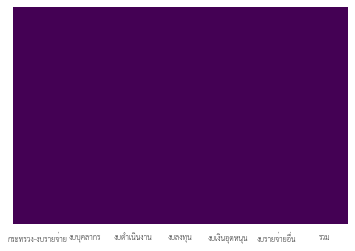

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df.describe()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,27195.485000,6160.595000,19022.945000,27206.26000,19430.800000,99016.085000
std,54545.204505,6930.912416,41009.446754,58029.94422,56140.041536,116020.051845
min,822.000000,531.200000,375.700000,30.70000,79.800000,2279.200000
25%,2295.525000,1416.800000,820.500000,701.77500,709.800000,8108.025000
50%,6904.600000,2514.450000,3377.150000,1941.70000,1556.950000,34313.300000
75%,14581.200000,9455.200000,15075.950000,13447.32500,3102.775000,156841.400000
max,223199.600000,24102.900000,177009.100000,235503.60000,244863.500000,356449.700000


In [11]:
ddf = df[['งบบุคลากร','งบดําเนินงาน','งบลงทุน', 'งบเงินอุดหนุน','งบรายจ่ายอื่น']]
ddf.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,3671.6,1375.7,375.7,63712.9,584.4
16,2321.9,1430.5,2325.4,1070.7,814.4
17,223199.6,20029.5,19437.0,88628.9,5154.7
18,107548.0,14411.4,17025.5,6637.5,179.9
19,1635.9,603.4,745.8,157.9,1516.2


จะไม่ตัด Outlier ออกเนื่องจากต้องการเทียบทุกกระทรวง

In [12]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(ddf)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [13]:
df_normalized.describe()

,0,1,2,3,4
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-1.082467e-16,7.771561e-17,2.775558e-17,-2.220446e-17,-3.330669e-17
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-4.960771e-01,-8.333156e-01,-4.665186e-01,-4.804681e-01,-3.536461e-01
25%,-4.683605e-01,-7.022208e-01,-4.553906e-01,-4.686034e-01,-3.421326e-01
50%,-3.816652e-01,-5.397364e-01,-3.914280e-01,-4.466813e-01,-3.266507e-01
75%,-2.372708e-01,4.876982e-01,-9.874631e-02,-2.432601e-01,-2.984002e-01
max,3.686777e+00,2.655987e+00,3.952513e+00,3.682729e+00,4.119859e+00


C:\Users\PPUNN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'SSE')

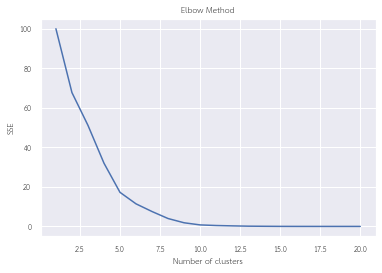

In [14]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

จากกราฟพบว่าค่า k วัดจากจุดที่เปลี่ยนแปลงความชันมากที่สุดอยู่ที่ประมาณ 5

In [15]:
k = 5

In [16]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=5)

In [17]:
cluster_predictions = kmeans.predict(df_normalized)
ddf['cluster_id'] = cluster_predictions
ddf.tail(10)

C:\Users\PPUNN\AppData\Local\Temp/ipykernel_18620/579068457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['cluster_id'] = cluster_predictions


,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
10,10992.6,5199.8,10408.8,1103.6,1630.9,1
11,822.0,531.2,707.8,30.7,187.5,1
12,2216.4,1585.4,845.4,479.5,1698.8,1
13,19360.2,12718.1,38441.4,235503.6,28464.4,3
14,10363.6,8775.0,3333.1,1937.6,2418.8,1
15,3671.6,1375.7,375.7,63712.9,584.4,1
16,2321.9,1430.5,2325.4,1070.7,814.4,1
17,223199.6,20029.5,19437.0,88628.9,5154.7,2
18,107548.0,14411.4,17025.5,6637.5,179.9,2
19,1635.9,603.4,745.8,157.9,1516.2,1


In [18]:
ddf.cluster_id.value_counts()

1    13
2     3
0     2
4     1
3     1
Name: cluster_id, dtype: int64

## silhouette_score

In [19]:
print(metrics.silhouette_score(ddf,kmeans.labels_))

0.5172476961349493


silhouette_score ยิ่งใกล้เคียง 1 ยิ่งแม่นยำ

## davies_bouldin_score

In [20]:
print(metrics.davies_bouldin_score(ddf,kmeans.labels_))

0.572369948033707


davies_bouldin_score ยิ่งใกล้เคียง 0 ยิ่งแม่นยำ

## 5 Clusters

#### Cluster 0

In [21]:
ddf[ddf.cluster_id==0].mean()

งบบุคลากร         17040.65
งบดําเนินงาน       6966.00
งบลงทุน          124650.95
งบเงินอุดหนุน      1029.10
งบรายจ่ายอื่น       658.20
cluster_id            0.00
dtype: float64

In [22]:
df[ddf.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7


#### Cluster 1

In [23]:
ddf[ddf.cluster_id==1].mean()

งบบุคลากร         4285.000000
งบดําเนินงาน      2419.238462
งบลงทุน           2954.292308
งบเงินอุดหนุน    15838.707692
งบรายจ่ายอื่น     2189.023077
cluster_id           1.000000
dtype: float64

In [24]:
df[ddf.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,29335.7
11,กระทรวงพลังงาน,822.0,531.2,707.8,30.7,187.5,2279.2
12,กระทรวงพาณิชย์,2216.4,1585.4,845.4,479.5,1698.8,6825.5
14,กระทรวงยุติธรรม,10363.6,8775.0,3333.1,1937.6,2418.8,26828.1


#### Cluster 2

In [25]:
ddf[ddf.cluster_id==2].mean()

งบบุคลากร        140591.666667
งบดําเนินงาน      19514.600000
งบลงทุน           16962.866667
งบเงินอุดหนุน     33353.600000
งบรายจ่ายอื่น     28504.800000
cluster_id            2.000000
dtype: float64

In [26]:
df[ddf.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
17,กระทรวงศึกษาธิการ,223199.6,20029.5,19437.0,88628.9,5154.7,356449.7
18,กระทรวงสาธารณสุข,107548.0,14411.4,17025.5,6637.5,179.9,145802.3


#### Cluster 3

In [27]:
ddf[ddf.cluster_id==3].mean()

งบบุคลากร         19360.2
งบดําเนินงาน      12718.1
งบลงทุน           38441.4
งบเงินอุดหนุน    235503.6
งบรายจ่ายอื่น     28464.4
cluster_id            3.0
dtype: float64

In [28]:
df[ddf.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
13,กระทรวงมหาดไทย,19360.2,12718.1,38441.4,235503.6,28464.4,334487.7


#### Cluster 4

In [29]:
ddf[ddf.cluster_id==4].mean()

งบบุคลากร         12988.2
งบดําเนินงาน       6567.9
งบลงทุน            3421.2
งบเงินอุดหนุน       599.4
งบรายจ่ายอื่น    244863.5
cluster_id            4.0
dtype: float64

In [30]:
df[ddf.cluster_id==4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2


## Export

In [36]:
show = pd.concat([df, ddf], axis=1, join="inner")
show

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9,4104.5,3078.3,6104.3,12397.0,13606.8,1
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6,91027.4,24102.9,14426.1,4794.4,80179.8,2
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2,12988.2,6567.9,3421.2,599.4,244863.5,4
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4,2697.3,2509.6,397.5,1348.7,1203.3,1
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7,1572.6,892.1,1564.4,735.9,1327.7,1
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8,2746.6,2519.3,397.8,16598.3,79.8,1
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0,11248.4,939.9,9956.4,104384.6,1597.7,1
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1,24376.6,11495.8,72292.8,2001.1,564.8,0
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7,9704.7,2436.2,177009.1,57.1,751.6,0
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7,1311.6,2009.9,1243.4,1945.8,1791.0,1


In [37]:
show.sort_values(by=["cluster_id"])

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1,24376.6,11495.8,72292.8,2001.1,564.8,0
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7,9704.7,2436.2,177009.1,57.1,751.6,0
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9,4104.5,3078.3,6104.3,12397.0,13606.8,1
16,กระทรวงวัฒนธรรม,2321.9,1430.5,2325.4,1070.7,814.4,7962.9,2321.9,1430.5,2325.4,1070.7,814.4,1
15,กระทรวงเเรงงาน,3671.6,1375.7,375.7,63712.9,584.4,69720.3,3671.6,1375.7,375.7,63712.9,584.4,1
14,กระทรวงยุติธรรม,10363.6,8775.0,3333.1,1937.6,2418.8,26828.1,10363.6,8775.0,3333.1,1937.6,2418.8,1
12,กระทรวงพาณิชย์,2216.4,1585.4,845.4,479.5,1698.8,6825.5,2216.4,1585.4,845.4,479.5,1698.8,1
11,กระทรวงพลังงาน,822.0,531.2,707.8,30.7,187.5,2279.2,822.0,531.2,707.8,30.7,187.5,1
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,29335.7,10992.6,5199.8,10408.8,1103.6,1630.9,1
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7,1311.6,2009.9,1243.4,1945.8,1791.0,1


In [42]:
show2 = ddf[ddf.cluster_id==0].mean()
for i in range(k-1):
    show2 = pd.concat([show2, ddf[ddf.cluster_id==(i+1)].mean()], axis=1, join="inner")



In [43]:
show2

,0,1,0,0,0
งบบุคลากร,17040.65,4285.000000,140591.666667,19360.2,12988.2
งบดําเนินงาน,6966.00,2419.238462,19514.600000,12718.1,6567.9
งบลงทุน,124650.95,2954.292308,16962.866667,38441.4,3421.2
งบเงินอุดหนุน,1029.10,15838.707692,33353.600000,235503.6,599.4
งบรายจ่ายอื่น,658.20,2189.023077,28504.800000,28464.4,244863.5
cluster_id,0.00,1.000000,2.000000,3.0,4.0
